<a href="https://colab.research.google.com/github/ajrianop/Python/blob/main/6_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seaborn**

## **Import libraries and calling the dataset**

We are going to take the dataset from `http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv`, this dataset describes some columns with information about cars manufacturers.

In [1]:
#Dataset taken from the courses
import pandas as pd

df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


We are going to describe and histogram of:


1.   Eng Displ: How many liters the engine is
2.   Cylinders
2.   CityMPG : Miles per Galon in the City
3.   HwyMPG : Miles per Galon in the Highway
4.   CombMPG : Miles per Galon in both City and Highway
5.   #Gears



We are going to count all the values in each of the previous variables and describe it as a bar plot graph. Using the usual tools without calling other library we have to plot each others one by one. So let us plot two of them one with the index in disorder and other with an ordered index.

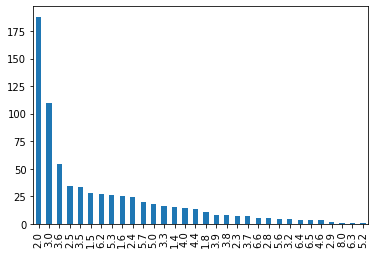

In [2]:
count_eng_dis= df['Eng Displ'].value_counts()
#The following plotting is ordered according to the large number of elements
count_eng_dis.plot(kind='bar')

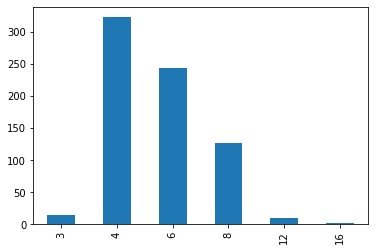

In [3]:
count_cilinders= df['Cylinders'].value_counts().sort_index()
#The following plotting is ordered according to the index (number of Cilinders)
count_cilinders.plot(kind='bar')

## **What is Seaborn?**

Seaborn is a library in charge od Python data visualization whihc is based on MatPlotLib. It has a better interface for drawing and interacting with each visualization 

In [4]:
import seaborn as sns
sns.set()

We can note with one of the previous plots, if we run the code the plot has a better interface:

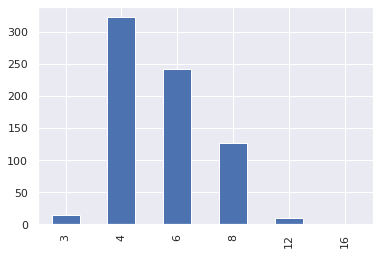

In [5]:
#The previous plot but now with seaborn library
count_cilinders.plot(kind='bar')

## **Distplot**

We can see how is the distribution of the data using displot, which compares the information in a discrete way by means an histogram with a continuous function which is a smooth distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


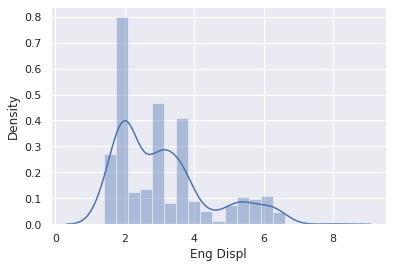

In [6]:
sns.distplot(df['Eng Displ'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


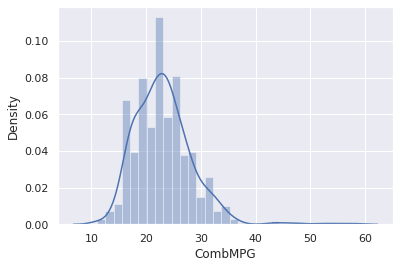

In [7]:
sns.distplot(df['CombMPG'])

## **Pair plot**

We can use pair plot to see how each data behaviour with respect to the other. We can divide by groups according to the classification of a column. So we want to compare the MPG in the three aspect: City, Highway and Combine also see how is the behaviour with respect to cilynders and made the scatter plot.

In [8]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


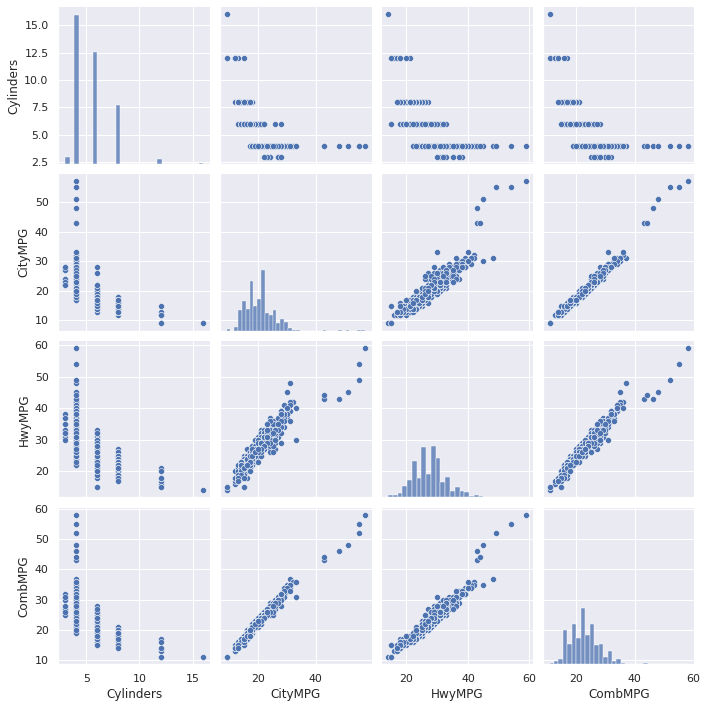

In [9]:
sns.pairplot(df2, height=2.5) 

We can see if we group by the variable `Cylinders`, it is vanished in the plot (we use `hue='Cyliners'` to do that), so we add other column with this information in order to plot the information in `Cylinders`.Also that in the diagonal part we find a smooth distribution, but according to our data a good option is to see how is the behavious discretely

<ipython-input-10-4ea7f435d699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cylinders2']=df['Cylinders']


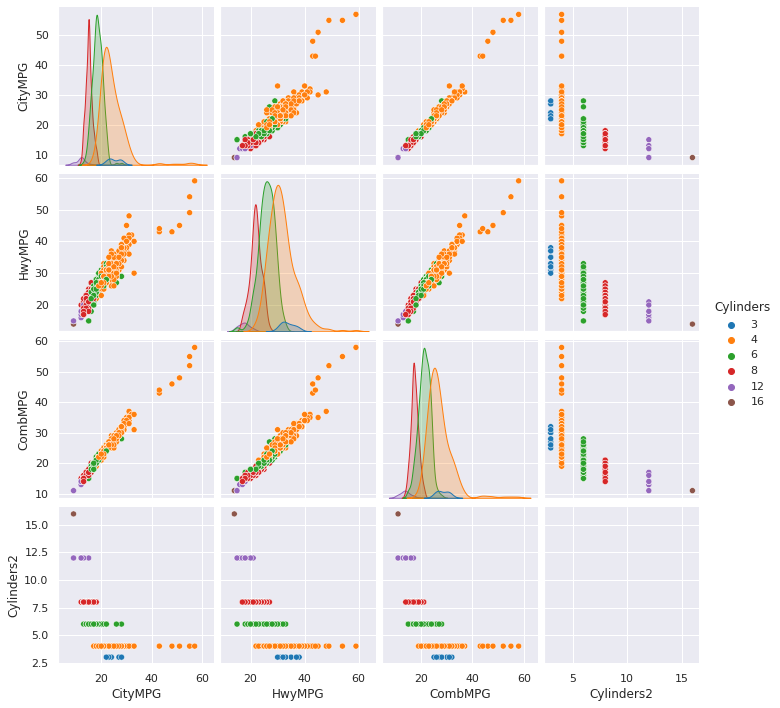

In [10]:
df2['Cylinders2']=df['Cylinders']
sns.pairplot(df2, hue='Cylinders', height=2.5, palette="tab10") 

We can see the comparison of the data in the diagonal with and histogram. We can compare both of the previous information, the smooth distriution is normalized a plotted according to the behaviour without consider the scale, while the second plot respect the scale given in the axis.

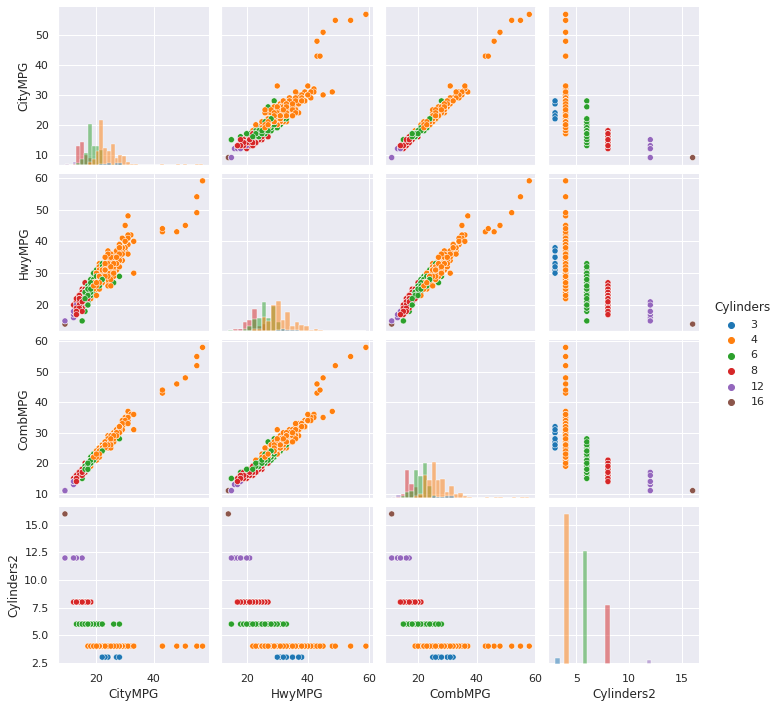

In [11]:
sns.pairplot(df2, hue='Cylinders', height=2.5, palette="tab10", diag_kind="hist") 

## **Scatter plot**

We can use scatter plot to see the relation between each variable individualy

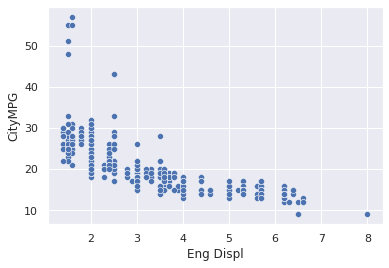

In [13]:
sns.scatterplot(x="Eng Displ", y="CityMPG", data=df)

## **Box plot**